In [1]:
from scholarversary import Scholarversary
import pandas as pd

In [2]:
s = Scholarversary()

In [3]:
msd = s.get_author_citation_milestone_dates("Jordan Matelsky")
msd

{1: '2017-04-17',
 10: '2019-01-01',
 50: '2020-08-31',
 100: '2021-11-01',
 200: '2023-04-13'}

In [9]:
wcby = s.get_author_work_cites_by_year("Jordan Matelsky", index_by="title")

df = pd.DataFrame(wcby).fillna(0).astype(int).sort_index()

# Get columnwise cumulatives:
dfc = df.cumsum(axis=0)

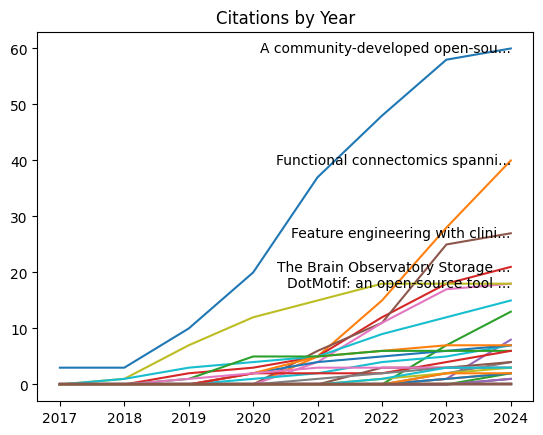

In [20]:
import matplotlib.pyplot as plt

dfc.plot.line(legend=False, title="Citations by Year")
# Get top N works and max cite count
top_works = dfc.max().sort_values(ascending=False).index[:5]
# label them
for work in top_works:
    plt.text(df.index[-1], dfc[work].iloc[-1], work[:30] + "...", ha="right", va="center")
# plt.yscale("log")

<Axes: title={'center': 'Total Citations by Year'}>

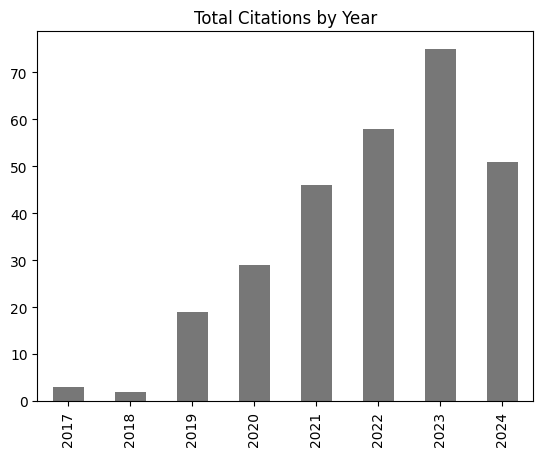

In [10]:
(
    pd.DataFrame(wcby)
    .fillna(0)
    .astype(int)
    .sort_index()
    .sum(axis=1)
    .plot.bar(title="Total Citations by Year", color="#777")
)